In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from subprocess import call

In [10]:
iris = datasets.load_digits()
ds = pd.DataFrame(iris.data, columns = iris.feature_names)
print(f"#examples :{ds.shape[0]} and #features: {ds.shape[1]}")

#examples :1797 and #features: 64


In [3]:
print(ds.head())
print("\n\nFeatures:", iris.feature_names)
X= np.unique(iris.data)
print(X)
print("\nLabels:", np.unique(iris.target_names))

   pixel_0_0  pixel_0_1  pixel_0_2  ...  pixel_7_5  pixel_7_6  pixel_7_7
0        0.0        0.0        5.0  ...        0.0        0.0        0.0
1        0.0        0.0        0.0  ...       10.0        0.0        0.0
2        0.0        0.0        0.0  ...       16.0        9.0        0.0
3        0.0        0.0        7.0  ...        9.0        0.0        0.0
4        0.0        0.0        0.0  ...        4.0        0.0        0.0

[5 rows x 64 columns]


Features: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel

In [11]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.35, random_state = 34)


In [12]:
dtclassifier = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 10)
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)

In [13]:
# Testing
y_prediction = dtclassifier.predict(x_test)

#  Accuracy
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:\n", accuracy)

#  Confusion Matrix
c_matrix = confusion_matrix(y_test, y_prediction)
print("\nConfusion Matrix:\n",c_matrix)

#  Precision
precision = precision_score(y_test, y_prediction, average=None)
print("\nPrecision Score:\n", precision)

#  Recall
recall = recall_score(y_test, y_prediction, average=None)
print("\nRecall Score:\n", recall)

Accuracy Score:
 0.6756756756756757

Confusion Matrix:
 [[67  0  0  0  1  1  1  0  1  1]
 [ 0  0 15  2  0  9  2  2 20  7]
 [ 0  0 35  7  0  0  4  1 12  0]
 [ 0  0  2 57  6  5  0  0  0  3]
 [ 0  0  5  0 36  2 12 14  1  1]
 [ 0  0  3  0  0 53  4  0  1  2]
 [ 0  0  1  0  0  0 55  0  1  0]
 [ 0  0  0  1 15  4  1 29  1  0]
 [ 0  0 11  0  1  1  0  0 54  0]
 [ 0  0  1 15  0  1  0  2  1 39]]

Precision Score:
 [1.         0.         0.47945205 0.69512195 0.61016949 0.69736842
 0.69620253 0.60416667 0.58695652 0.73584906]

Recall Score:
 [0.93055556 0.         0.59322034 0.78082192 0.50704225 0.84126984
 0.96491228 0.56862745 0.80597015 0.66101695]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(list(iris.target_names))
list_string=map(str, list(iris.target_names))
print(list(list_string))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


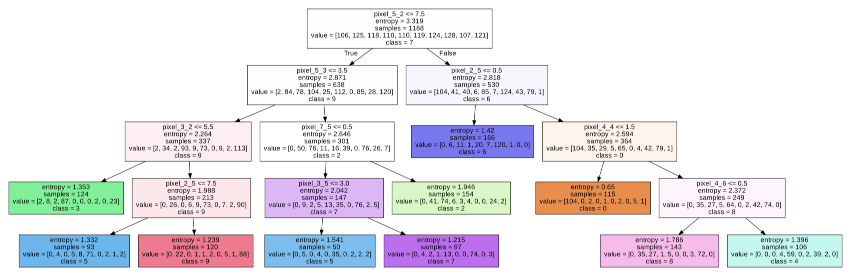

In [45]:
export_graphviz(dtclassifier, out_file='digit_tree.dot',
                feature_names=list(iris.feature_names),
               class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                filled=True)

# Convert to png
call(['dot', '-Tpng', 'digit_tree.dot', '-o', 'digit_tree.png', '-Gdpi=600'])
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('digit_tree.png'))
plt.axis('off')
plt.show()